In [26]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [110]:
# Parameters
n_samples = 1000
learning_rate = 0.001
training_epochs = 20

In [111]:
# Generate 1000 points arround the lien 7.5x+50 (AX=b)
base_a = 7.5
base_b = 50
x_train = list(range(1, 100))
y_train = [base_a * x + base_b + np.random.randn()*50 for x in x_train] 

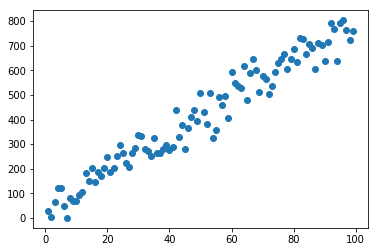

In [112]:
plt.plot(x_train, y_train, 'o')

In [113]:
# placeholders that will reveive the data
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
A = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

In [114]:
# Lienar model
prediction = tf.add(tf.multiply(A, X), b) # Ax+b

# Mean squared error
cost_function = tf.reduce_sum(tf.pow(prediction-Y, 2))/(2*n_samples)

In [115]:
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [116]:
# Initialize the variables
init = tf.global_variables_initializer()

Step: 1 cost= 7250.1699 A= 1.55489 b= 0.327357
Step: 2 cost= 3829.8235 A= 3.39449 b= 0.356928
Step: 3 cost= 2056.8906 A= 4.71781 b= 0.378456
Step: 4 cost= 1137.2866 A= 5.66974 b= 0.394199
Step: 5 cost= 659.8591 A= 6.35451 b= 0.40578
Step: 6 cost= 411.6840 A= 6.84709 b= 0.414367
Step: 7 cost= 282.4543 A= 7.20143 b= 0.4208
Step: 8 cost= 215.0008 A= 7.45632 b= 0.425685
Step: 9 cost= 179.6777 A= 7.63967 b= 0.429454
Step: 10 cost= 161.0976 A= 7.77156 b= 0.432422
Step: 11 cost= 151.2667 A= 7.86643 b= 0.434814
Step: 12 cost= 146.0236 A= 7.93468 b= 0.436791
Step: 13 cost= 143.1981 A= 7.98376 b= 0.438469
Step: 14 cost= 141.6553 A= 8.01907 b= 0.439932
Step: 15 cost= 140.7985 A= 8.04446 b= 0.441241
Step: 16 cost= 140.3131 A= 8.06273 b= 0.442439
Step: 17 cost= 140.0314 A= 8.07587 b= 0.443557
Step: 18 cost= 139.8639 A= 8.08531 b= 0.444617
Step: 19 cost= 139.7613 A= 8.0921 b= 0.445637
Training cost= 139.761 A= 8.0921 b= 0.445637 



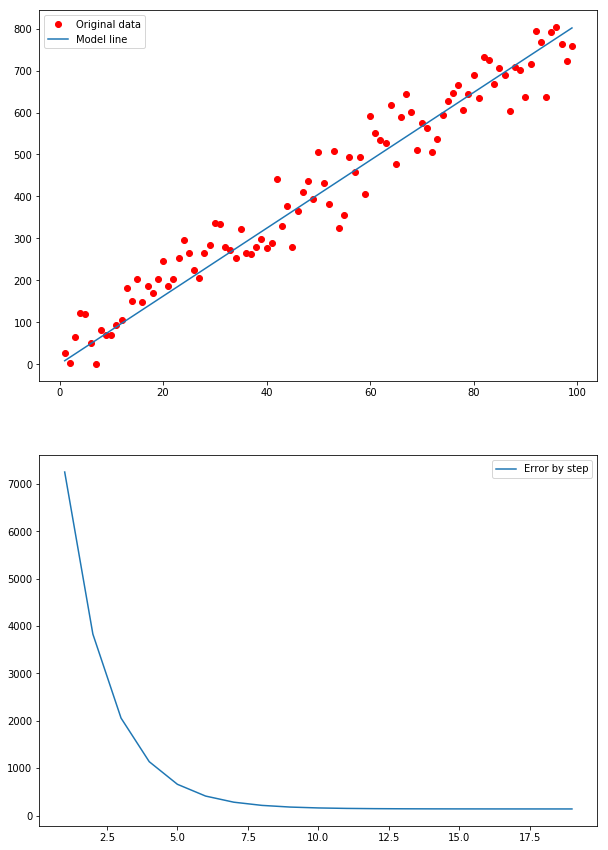

In [121]:
with tf.Session() as sess:

    # initialize variables
    sess.run(init)
    cost_errors = []
    
    for epoch in range(1, training_epochs):
        for (x, y) in zip(x_train, y_train):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        cost = sess.run(cost_function, feed_dict={X: x_train, Y:y_train})
        cost_errors.append(cost)
        print("Step:", '%01d' % (epoch), "cost=", "{:.4f}".format(cost), "A=", sess.run(A), "b=", sess.run(b))

    training_cost = sess.run(cost_function, feed_dict={X: x_train, Y: y_train})
    print("Training cost=", training_cost, "A=", sess.run(A), "b=", sess.run(b), '\n')

    # Graphic result
    plt.figure(figsize=(10,15))
    y_result = [sess.run(A) * x + sess.run(b) for x in x_train]
    plt.subplot(2, 1, 1)
    plt.plot(x_train, y_train, 'ro', label='Original data')
    plt.plot(x_train, y_result, label='Model line')
    plt.legend()
    
    # Erro by step
    plt.subplot(2, 1, 2)
    plt.plot(list(range(1,training_epochs)), cost_errors, label='Error by step')
    plt.legend()